# CODECADEMY WALKTHROUGH MACHINE LEARNING PORTFOLIO PROJECT: OKCUPID DATE A SCIENTIST

### INTRODUCTION

In recent years, there has been a massive rise in the usage of dating apps to find love. Many of these apps use sophisticated data science techniques to recommend possible matches to users and to optimize the user experience. These apps give us access to a wealth of information that we’ve never had before about how different people experience romance.

This portfolio project will analyze some data from OKCupid, an app that focuses on using multiple choice and short answers to match users.

### SCOPING

Project scoping creates a structure for the entire project. This includes stating the goals for the project, gathering the data, considering the analytical steps required through analysis and evaluation which will help build conclusions and findings from the analysis. A proper project scope can be a great road map for any project. 

#### PROJECT GOALS

The project goal is to utilize the machine learning skills and its techniques to the OKCupid App User Profile dataset. Zodiac symbols are important for many users, but some users don’t add them in. This project will classify Zodiac signs using drinking, smoking, drugs, and essays as the features and will predict a user’s zodiac signs so we can guess the missing zodiacs when we make matches.  

#### DATA

The data is stored in profiles.csv provided by codecademy. The dataset provided has the following columns of multiple-choice data:

- age: continuous variable of users age 
- body_type: categorical variable of body type of user
- diet: categorical variable of dietary information
- drinks: categorical variable of alcohol consumption
- drugs: categorical variable of drug usage
- education: categorical variable of educational attainment
- ethnicity: categorical variable of ethnic backgrounds
- height: continuous variable of height of user
- income: continuous variable of income of user
- job: categorical variable of employment description
- offspring: categorical variable of children status
- orientation: categorical variable of sexual orientation
- pets: categorical variable of pet preferences
- religion: categorical variable of religious background
- sex: categorical variable of gender
- sign: categorical variable of astrological symbol
- smokes: categorical variable of smoking consumption
- speaks: categorical variable of language spoken
- status: categorical variable of relationship status
- last_online: date variable of last login
- location: categorical variable of user locations
  
And a set of open short-answer responses to :

- essay0: My self summary
- essay1: What I’m doing with my life
- essay2: I’m really good at
- essay3: The first thing people usually notice about me
- essay4: Favorite books, movies, show, music, and food
- essay5: The six things I could never do without
- essay6: I spend a lot of time thinking about
- essay7: On a typical Friday night I am
- essay8: The most private thing I am willing to admit
- essay9: You should message me if…

#### ANALYSIS

After the data is received, summary statistics, descriptive statistics like mean, median, range, correlations,Data visualizations for univariate and multivariate exploration and short summary notes explaining insights gained from exploration. Since zodiac signs are being classified to make predictions on missing zodiac signs, machine learning classification algorithms will be implemented to solve the problem of this project.

#### EVALUATION

Once the model is created, metrics of success are used to evaluate the model performance(s). This include the use of confusion matrix and finding the accuracy, precision, recall, f1 of the model(s) used, and create graphs showing how they changed. The main components to include in the machine learning evaluation are:

- Table showing model performance
- Charts showing model performance

##### IMPORT STATEMENTS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

##### LOAD THE DATA

In [2]:
profiles = pd.read_csv('profiles.csv')
profiles.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


##### INSPECT THE DATA

In [3]:
print(profiles.shape)

(59946, 31)


In [4]:
list(profiles.columns)

['age',
 'body_type',
 'diet',
 'drinks',
 'drugs',
 'education',
 'essay0',
 'essay1',
 'essay2',
 'essay3',
 'essay4',
 'essay5',
 'essay6',
 'essay7',
 'essay8',
 'essay9',
 'ethnicity',
 'height',
 'income',
 'job',
 'last_online',
 'location',
 'offspring',
 'orientation',
 'pets',
 'religion',
 'sex',
 'sign',
 'smokes',
 'speaks',
 'status']

In [5]:
profiles_cols = profiles.columns

#for col in profiles_cols:
    #print(f"{col}:{profiles[col].unique()}")

In [6]:
print(profiles.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

In [7]:
profiles.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


In [8]:
print('number of zodaic_signs:',profiles['sign'].nunique())
print('zodaic_signs:',profiles['sign'].unique())
print(profiles['sign'].value_counts())

number of zodaic_signs: 48
zodaic_signs: ['gemini' 'cancer' 'pisces but it doesn&rsquo;t matter' 'pisces'
 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'gemini but it doesn&rsquo;t matter' 'cancer but it doesn&rsquo;t matter'
 'leo but it doesn&rsquo;t matter' nan
 'aquarius but it doesn&rsquo;t matter'
 'aries and it&rsquo;s fun to think about'
 'libra but it doesn&rsquo;t matter'
 'pisces and it&rsquo;s fun to think about' 'libra'
 'taurus but it doesn&rsquo;t matter'
 'sagittarius but it doesn&rsquo;t matter' 'scorpio and it matters a lot'
 'gemini and it&rsquo;s fun to think about'
 'leo and it&rsquo;s fun to think about'
 'cancer and it&rsquo;s fun to think about'
 'libra and it&rsquo;s fun to think about'
 'aquarius and it&rsquo;s fun to think about'
 'virgo but it doesn&rsquo;t matter'
 'scorpio and it&rsquo;s fun to think about'
 'capricorn but it doesn&rsquo;t matter' 'scorpio'
 'capricorn and it&rsquo;s fun to think about' 'leo'
 'aries but it doesn&rsquo;t matter' 'aries'
 'sc

From our inspection of the sign column, there are 48, but there should only be 12 signs. Upon closer inspection, there seems to be special characters and text attached with the signs.
These text as well as special characters (eg \&rsquo; for a single quote ') will need to be removed.

In [9]:
print(profiles['age'].unique())
print(profiles['age'].value_counts())

[ 22  35  38  23  29  32  31  24  37  28  30  39  33  26  27  20  25  40
  36  21  34  43  46  41  42  45  18  55  50  59  44  48  54  51  62  52
  19  58  66  53  63  47  49  61  60  57  56  65  64  68 110  69  67 109]
age
26     3724
27     3685
28     3583
25     3531
29     3295
24     3242
30     3149
31     2735
23     2592
32     2587
33     2206
22     1934
34     1902
35     1755
36     1583
37     1427
38     1330
21     1282
39     1172
42     1072
40     1030
41      980
20      953
43      858
44      708
45      643
19      611
46      578
47      529
48      481
49      459
50      437
51      350
52      344
18      309
56      271
54      267
55      265
57      256
53      252
59      221
58      197
60      195
61      176
62      167
63      138
64      113
65      109
66      105
67       66
68       59
69       31
110       1
109       1
Name: count, dtype: int64


From our age column, we have two users with age 110 years and age 109 years which are outliers to the age column. In real life, its impossible for users of these ages to be on a dating site. Since these outliers are just two in numbers, We will keep them because the two data points should have minimal effect on our ML model.

In [10]:
print(profiles['height'].unique())
print(profiles['height'].value_counts())

[75. 70. 68. 71. 66. 67. 65. 72. 62. 64. 69. 73. 74. 60. 63. 76. 61. 78.
 79. 59. 80. 91. 83. 77. 58. 56. 95. 57. 87. 81. 36. 43. 52. 55. 53. 93.
  8. 54. 82.  3. 86. 42. 84. 94. 50.  6. 47. 49. 48. 90. 88. nan 37.  9.
 51.  1. 92. 26. 85. 89.  4.]
height
70.0    6074
68.0    5449
67.0    5354
72.0    5315
69.0    5179
71.0    4826
66.0    4759
64.0    3865
65.0    3794
73.0    2815
63.0    2767
74.0    2547
62.0    2244
75.0    1382
61.0    1090
60.0     791
76.0     783
77.0     280
59.0     212
78.0     132
79.0      57
58.0      53
80.0      27
95.0      20
57.0      17
83.0      12
36.0      11
81.0      11
82.0      11
84.0       9
56.0       8
55.0       6
53.0       5
91.0       3
54.0       3
94.0       3
43.0       2
88.0       2
37.0       2
50.0       2
48.0       2
93.0       1
87.0       1
52.0       1
86.0       1
42.0       1
8.0        1
3.0        1
49.0       1
47.0       1
6.0        1
90.0       1
9.0        1
51.0       1
1.0        1
92.0       1
26.0       1
85.

Inspecting outliers for height (eg, 1, 3, 4, 6, 8 or 9 inches) shows there are outliers and this may be as a result of typos. The data can be included since height is not a major indicator to solve the machine learning problem.

In [11]:
print(profiles['income'].unique())
print(profiles['income'].value_counts())

[     -1   80000   20000   40000   30000   50000   60000 1000000  150000
  100000  500000   70000  250000]
income
-1          48442
 20000       2952
 100000      1621
 80000       1111
 30000       1048
 40000       1005
 50000        975
 60000        736
 70000        707
 150000       631
 1000000      521
 250000       149
 500000        48
Name: count, dtype: int64


Its impossible to have income of -1, this could be as a result of typos. So we will replace the -1 income with NaNs, or null values, and use regex to  special characters if any.

##### DATA CLEANING

First to be explored is the number of unique signs. The text as well as special characters (eg \&rsquo; for a single quote '), that will need to be removed.

We will replace the -1 income values with NaNs, or no values, and use regex to remove special characters.

We will also use regex to remove special characters in some other columns. 

In [12]:
# replace special characters
profiles_cols = profiles.columns

for col in profiles_cols:
    profiles_cols.str.replace(r"&amp;", "&", regex=True)
    profiles_cols.str.replace(r"&rsquo;", "'", regex=True)
    # replace html
    profiles_cols.str.replace(r"<[^<>]*>", " ", regex=True)
    profiles_cols.str.replace(r"https?://", " ", regex=True)
    #replace \n
    profiles_cols.str.replace(r"\n", " ", regex=True)
    profiles_cols.str.replace(r"\'", "'", regex=True)
    #check if each special characters is replaced
    print(f"{col}:{profiles[col].unique()}")

age:[ 22  35  38  23  29  32  31  24  37  28  30  39  33  26  27  20  25  40
  36  21  34  43  46  41  42  45  18  55  50  59  44  48  54  51  62  52
  19  58  66  53  63  47  49  61  60  57  56  65  64  68 110  69  67 109]
body_type:['a little extra' 'average' 'thin' 'athletic' 'fit' nan 'skinny' 'curvy'
 'full figured' 'jacked' 'rather not say' 'used up' 'overweight']
diet:['strictly anything' 'mostly other' 'anything' 'vegetarian' nan
 'mostly anything' 'mostly vegetarian' 'strictly vegan'
 'strictly vegetarian' 'mostly vegan' 'strictly other' 'mostly halal'
 'other' 'vegan' 'mostly kosher' 'strictly halal' 'halal'
 'strictly kosher' 'kosher']
drinks:['socially' 'often' 'not at all' 'rarely' nan 'very often' 'desperately']
drugs:['never' 'sometimes' nan 'often']
education:['working on college/university' 'working on space camp'
 'graduated from masters program' 'graduated from college/university'
 'working on two-year college' nan 'graduated from high school'
 'working on masters pr

In [13]:
profiles['sign'] = profiles.sign.str.split().str.get(0)
print("Number of Zodaic signs:",profiles.sign.unique())

Number of Zodaic signs: ['gemini' 'cancer' 'pisces' 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'leo' nan 'aries' 'libra' 'scorpio' 'capricorn']


In [14]:
#checking few rows of the dataset to see if cleaning has been effected
profiles.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


#### EXPLORATORY DATA ANALYSIS

#### DATA VISUALIZATION

We are going to get the data visualization for our variables. The continuous variables and the categorical variable. Starting with the continuous variable, we visualize data for the age variable. 

#### Age Distribution of Users

In [15]:
profile_age_sex = profiles.groupby(['age','sex']).size().unstack(fill_value=0)
#profile_age_sex

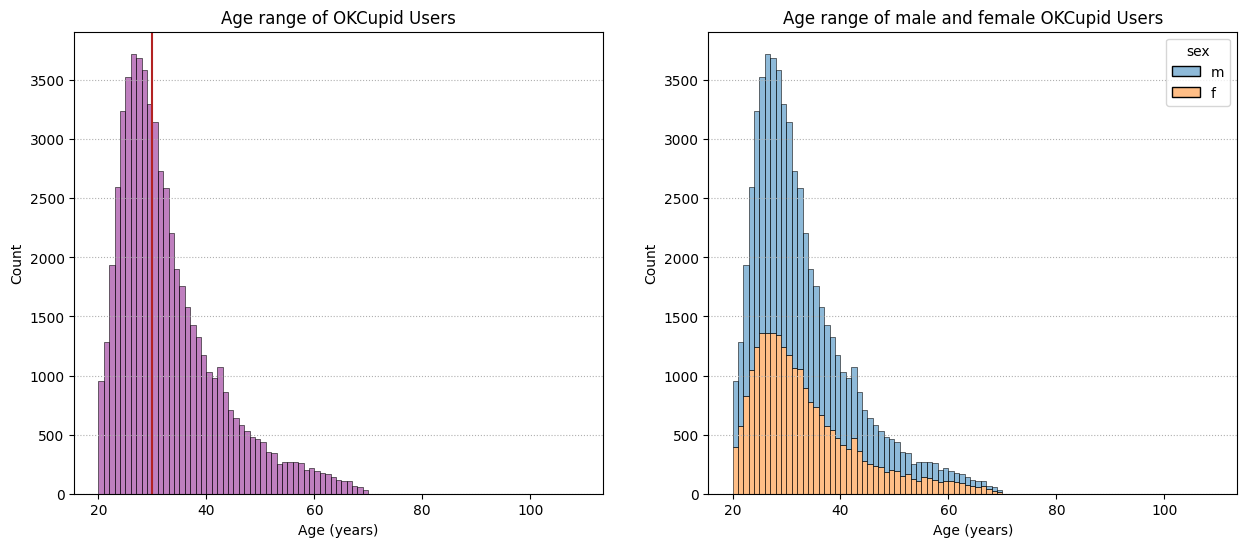

In [16]:
median_age = profiles.age.median()
#charts for age distribution
fig = plt.subplots(1,2, figsize=(15,6))
plt.subplot(1, 2, 1)
sns.histplot(data=profiles, x='age', bins=range(20, 110), color='purple', edgecolor='black', alpha=0.5)
plt.title('Age range of OKCupid Users')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.axvline(median_age, color='firebrick')
plt.grid(axis='y', linestyle=':')

plt.subplot(1, 2, 2)
sns.histplot(data=profiles, x='age', hue='sex', bins=range(20, 110), color='blue', edgecolor='black', alpha=0.5, multiple='stack')
plt.title('Age range of male and female OKCupid Users')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.grid(axis='y', linestyle=':')
plt.show()
print('',)

The most users are in their mid 20s to early 30s and there is a peak around age 25.It looks like there are slightly more females over the age of 55 on the site than males. Age median is 30 and also we can see that the distribution is right skewed, meaning that in our dataset less number of users fall below age 40.

#### Height Distribution of Users

In [17]:
print(profiles.height.unique())
profile_height_sex = profiles.groupby(['height','sex']).size().unstack(fill_value=0)
profile_height_sex

[75. 70. 68. 71. 66. 67. 65. 72. 62. 64. 69. 73. 74. 60. 63. 76. 61. 78.
 79. 59. 80. 91. 83. 77. 58. 56. 95. 57. 87. 81. 36. 43. 52. 55. 53. 93.
  8. 54. 82.  3. 86. 42. 84. 94. 50.  6. 47. 49. 48. 90. 88. nan 37.  9.
 51.  1. 92. 26. 85. 89.  4.]


sex,f,m
height,,
1.0,0,1
3.0,0,1
4.0,1,0
6.0,1,0
8.0,1,0
9.0,0,1
26.0,0,1
36.0,2,9
37.0,1,1


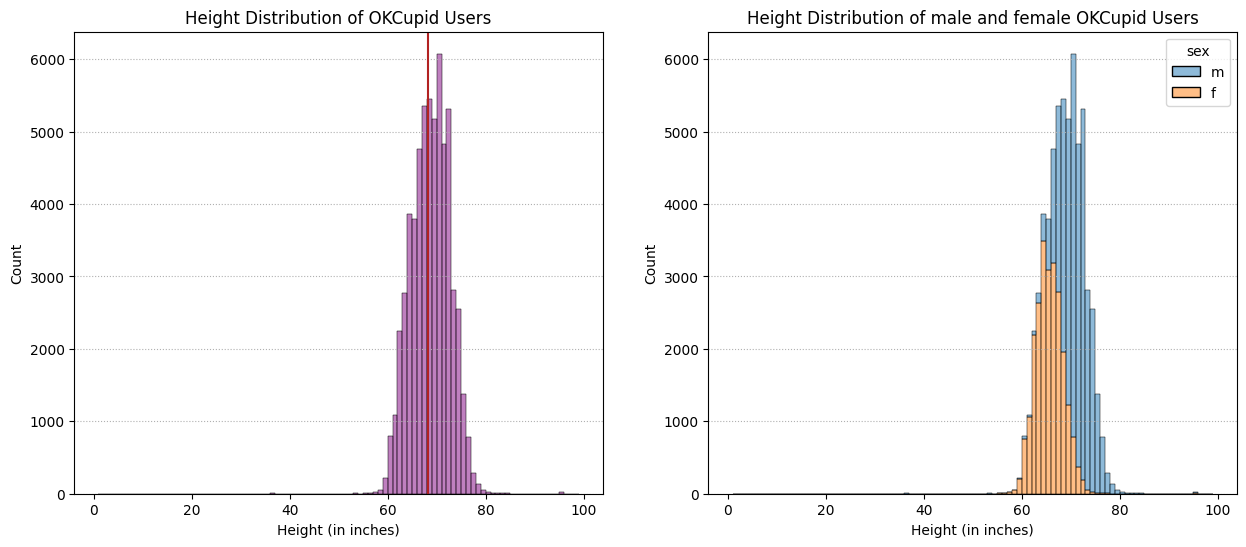

Average height:  68.29528051649066


In [18]:
#chart for height distribution
Average_height = profiles.height.mean()
fig = plt.subplots(1,2, figsize=(15,6))
plt.subplot(1, 2, 1)
sns.histplot(data=profiles, x='height', bins=range(1, 100), color='purple', edgecolor='black', alpha=0.5)
plt.title('Height Distribution of OKCupid Users')
plt.xlabel('Height (in inches)')
plt.ylabel('Count')
plt.axvline(Average_height, color='firebrick')
plt.grid(axis='y', linestyle=':')

plt.subplot(1, 2, 2)
sns.histplot(data=profiles, x='height', hue='sex', bins=range(1, 100), color='blue', edgecolor='black', alpha=0.5, multiple='stack')
plt.title('Height Distribution of male and female OKCupid Users')
plt.xlabel('Height (in inches)')
plt.ylabel('Count')
plt.grid(axis='y', linestyle=':')
plt.show()

print('Average height: ', Average_height)

The average height is 68 inches, The most frequent height of all users is about 70 inches. Most men are 70 inches, while most women are 64 inches. Its obvious that females tend to be shorter than males and the charts appears as a normal distribution.

#### Income Distribution of OKCupid Users

In [19]:
print(profiles.income.unique())

[     -1   80000   20000   40000   30000   50000   60000 1000000  150000
  100000  500000   70000  250000]


It's impossible for a user to have an income of -1. It is assumed that users with -1 as income are users who failed to fill their income information. So we take every -1 as missing data. I will replace -1 as nan showing that its a missing data

In [20]:
profiles["income"] = profiles["income"].replace(-1, np.nan)
print(profiles["income"].unique())

[     nan   80000.   20000.   40000.   30000.   50000.   60000. 1000000.
  150000.  100000.  500000.   70000.  250000.]


In [21]:
print(profiles['income'].isna().sum())

48442


In [22]:
print(profiles["income"].unique())

[     nan   80000.   20000.   40000.   30000.   50000.   60000. 1000000.
  150000.  100000.  500000.   70000.  250000.]


In [23]:
print(profiles["income"].value_counts(normalize=True, dropna = False) * 100)

income
NaN          80.809395
20000.0       4.924432
100000.0      2.704100
80000.0       1.853335
30000.0       1.748240
40000.0       1.676509
50000.0       1.626464
60000.0       1.227772
70000.0       1.179395
150000.0      1.052614
1000000.0     0.869116
250000.0      0.248557
500000.0      0.080072
Name: proportion, dtype: float64


80.8% of users in the app did not fill their income values hence the missing values represented as -1

In [24]:
profile_income_sex = profiles.groupby(['income','sex'], dropna = False).size().unstack(fill_value=0)
profile_income_sex

sex,f,m
income,,
20000.0,1031,1921
30000.0,320,728
40000.0,339,666
50000.0,311,664
60000.0,221,515
70000.0,166,541
80000.0,261,850
100000.0,256,1365
150000.0,75,556


In [25]:
Average_income = profiles.income.mean()
print('Average income: ', Average_income)

Average income:  104394.99304589708


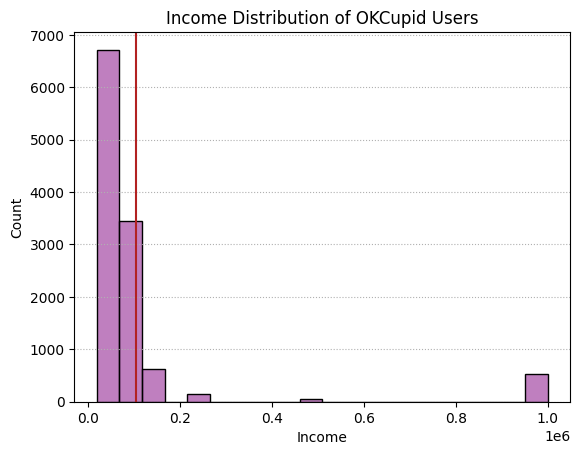

In [26]:
#chart for Income distribution
sns.histplot(data=profiles, x='income', binwidth=50000, color='purple', edgecolor='black', alpha=0.5)
plt.title('Income Distribution of OKCupid Users')
plt.xlabel('Income')
plt.ylabel('Count')
plt.axvline(Average_income, color='firebrick')
plt.grid(axis='y', linestyle=':')
plt.show()

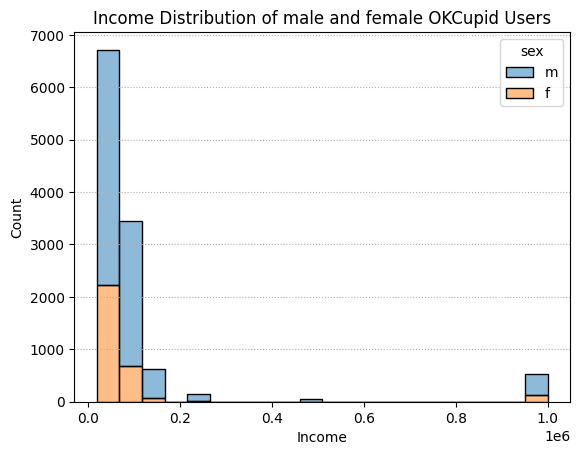

In [27]:
sns.histplot(data=profiles, x='income', hue='sex', binwidth = 50000, color='blue', edgecolor='black', alpha=0.5, multiple='stack')
plt.title('Income Distribution of male and female OKCupid Users')
plt.xlabel('Income')
plt.ylabel('Count')
plt.grid(axis='y', linestyle=':')
plt.show()

#### CATEGORICAL VARIABLES

#### SEX AND ORIENTATION OF USERS
We need to check the proportion of male and female users in the app and their orientation as well. 

In [28]:
print(profiles.sex.value_counts())

sex
m    35829
f    24117
Name: count, dtype: int64


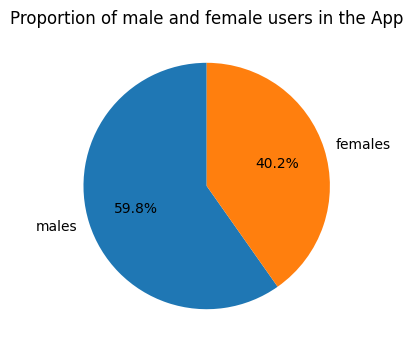

In [29]:
plt.figure(figsize=(4,4))
labels = ['males', 'females']
count = [35829, 24117]
plt.pie(count,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90)
plt.title('Proportion of male and female users in the App')
plt.show()

Male users are more in the app with a percentage of 59.8% (35829) and 40.2% (24117) of female users

In [30]:
print(profiles.orientation.value_counts(normalize=True)*100)

orientation
straight    86.087479
gay          9.296700
bisexual     4.615821
Name: proportion, dtype: float64


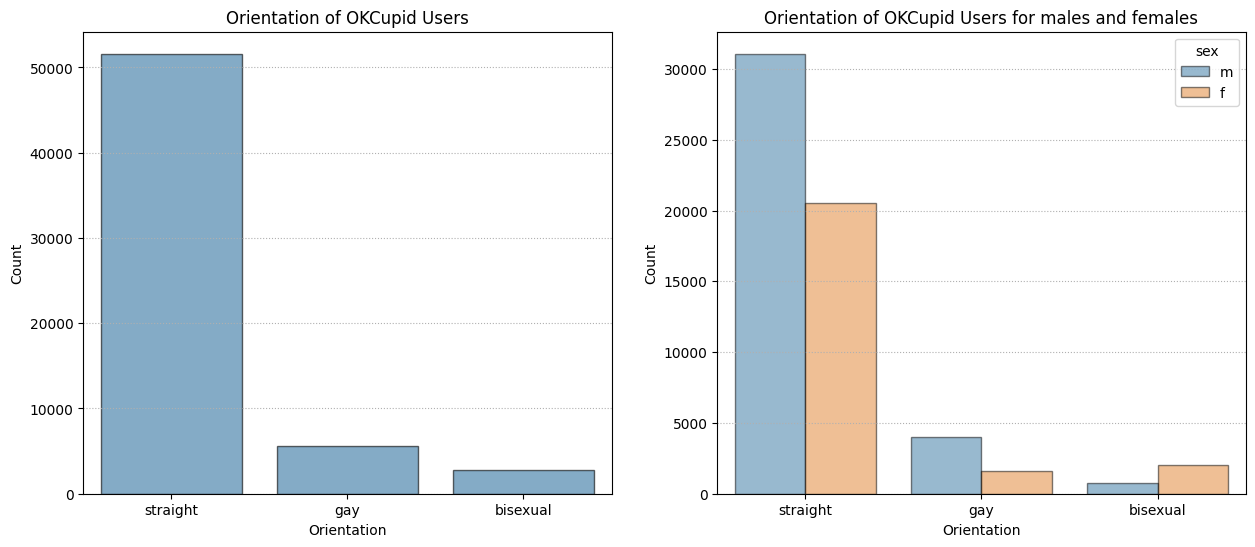

In [31]:
fig = plt.subplots(1,2, figsize=(15,6))
plt.subplot(1, 2, 1)
sns.countplot(data=profiles, x='orientation', order=profiles['orientation'].value_counts().index, edgecolor='black', alpha=0.6)
plt.xlabel('Orientation')
plt.ylabel('Count')
plt.title('Orientation of OKCupid Users')
plt.grid(axis='y', linestyle=':')

plt.subplot(1, 2, 2)
sns.countplot(data=profiles, x='orientation', hue='sex', order=profiles['orientation'].value_counts().index, edgecolor='black', alpha=0.5)
plt.xlabel('Orientation')
plt.ylabel('Count')
plt.title('Orientation of OKCupid Users for males and females')
plt.grid(axis='y', linestyle=':')

plt.show()

#### Status: Availability of Users


In [32]:
print(profiles.status.isna().sum())

0


In [33]:
status_count = profiles.status.value_counts(normalize=True) * 100
print(status_count)

status
single            92.911954
seeing someone     3.443099
available          3.111133
married            0.517132
unknown            0.016682
Name: proportion, dtype: float64


In [34]:
profiles.groupby(['status', 'sex']).size().unstack(fill_value=0)

sex,f,m
status,,
available,656,1209
married,135,175
seeing someone,1003,1061
single,22319,33378
unknown,4,6


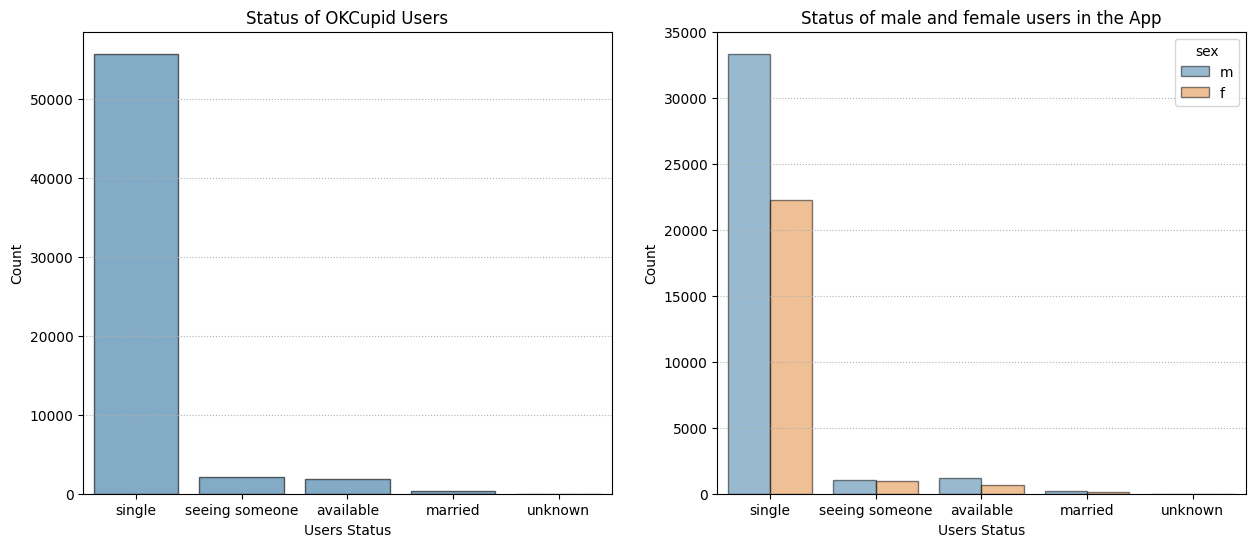

In [35]:
fig = plt.subplots(1,2, figsize=(15,6))
plt.subplot(1, 2, 1)
sns.countplot(data=profiles, x='status', order=profiles['status'].value_counts().index, edgecolor='black', alpha=0.6)
plt.xlabel('Users Status')
plt.ylabel('Count')
plt.title('Status of OKCupid Users')
plt.grid(axis='y', linestyle=':')

plt.subplot(1, 2, 2)
sns.countplot(data=profiles, x='status', hue='sex', order=profiles['status'].value_counts().index, edgecolor='black', alpha=0.5)
plt.xlabel('Users Status')
plt.ylabel('Count')
plt.title('Status of male and female users in the App')
plt.grid(axis='y', linestyle=':')

plt.show()

As expected for a dating site, most of the users for this app are single which is (96%) of the entire users population where we have more males than female users who are single

#### Signs: Zodaic Signs of OKCupid Users
One feature people look out for in dating app is zodiac signs

In [36]:
print(profiles.sign.isna().sum())

11056


In [37]:
profiles.sign.value_counts(normalize = True, dropna=False) * 100

sign
NaN            18.443266
leo             7.296567
gemini          7.189804
libra           7.017983
cancer          7.016315
virgo           6.907884
taurus          6.906216
scorpio         6.896207
aries           6.654322
pisces          6.582591
sagittarius     6.575918
aquarius        6.552564
capricorn       5.960364
Name: proportion, dtype: float64

In [38]:
sign_count = profiles.sign.value_counts(dropna=False)
print(sign_count)

sign
NaN            11056
leo             4374
gemini          4310
libra           4207
cancer          4206
virgo           4141
taurus          4140
scorpio         4134
aries           3989
pisces          3946
sagittarius     3942
aquarius        3928
capricorn       3573
Name: count, dtype: int64


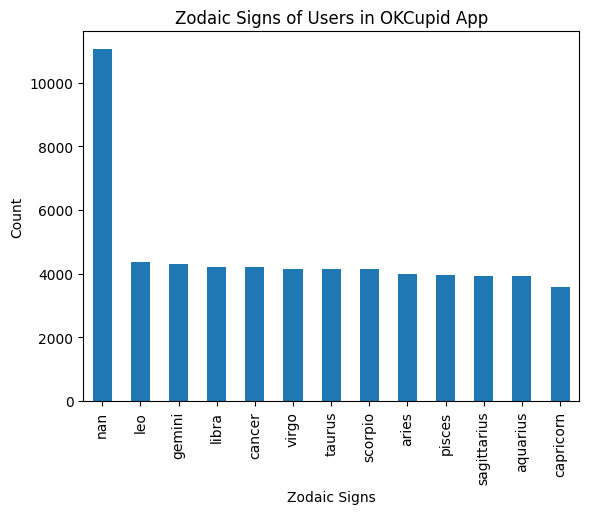

In [39]:
sign_count.plot(kind = 'bar', x = 'sign')
plt.xlabel('Zodaic Signs')
plt.ylabel('Count')
plt.title('Zodaic Signs of Users in OKCupid App')
plt.show()

Over 18% (11056) of users had missing sign values in the dataset.

#### Ethnicity and Language (Speaks): How diverse is OkCupid and what languages do they speak?

In [40]:
print(profiles.ethnicity.isna().sum())

5680


In [41]:
profiles.ethnicity = profiles.ethnicity.fillna('no ethnicity')

In [42]:
ethnicity_count = (profiles.ethnicity.value_counts(normalize=True, dropna=False) * 100)[0:6]
print(ethnicity_count)

ethnicity
white               54.767624
asian               10.232543
no ethnicity         9.475194
hispanic / latin     4.709238
black                3.349681
other                2.845895
Name: proportion, dtype: float64


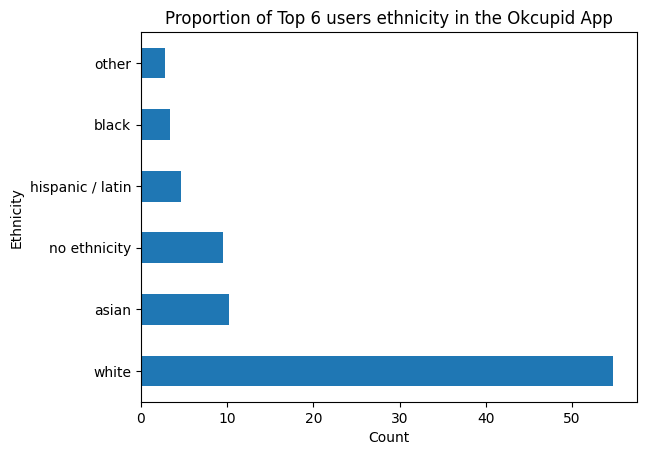

In [43]:
ethnicity_count.plot(kind='barh', y="ethnicity_count.index")
plt.xlabel('Count')
plt.ylabel('Ethnicity')
plt.title('Proportion of Top 6 users ethnicity in the Okcupid App')
plt.show()

About 90% of the users in the app filled their ethnicity data giving missing ethnicity data of about 10%. From the population of users in the app 60% are white. The next highest ethnicity is Asian at 11%. There are enough users who indicated more than one ethnicity that plotting the information resulted in a chart too large to fit on my screen. We will keep this information in mind when we get to the modeling stage.

In [44]:
print(profiles.speaks.isna().sum())

50


In [45]:
language_count = profiles.speaks.value_counts(normalize=True) * 100
print(language_count)

speaks
english                                                                                36.443168
english (fluently)                                                                     11.065847
english (fluently), spanish (poorly)                                                    3.437625
english (fluently), spanish (okay)                                                      3.200548
english (fluently), spanish (fluently)                                                  2.150394
                                                                                         ...    
english (fluently), spanish (poorly), italian (poorly), khmer (poorly)                  0.001670
english (fluently), ukrainian (fluently), russian (fluently)                            0.001670
english (fluently), other (okay), german (okay), spanish (poorly), tagalog (poorly)     0.001670
english (fluently), spanish (poorly), tagalog (okay), french (poorly)                   0.001670
english (fluently), spa

In [46]:
english_speakers = profiles['speaks'].str.contains("english")
count = english_speakers.sum()
print(count)

59896


Majority of users are multilingual, however all users included "english" as their main language. This indicates language will not affect whether or not someone is a match?

#### Location of OKCupid Users or where do Users live?

In [47]:
print(profiles.location.isna().sum())

0


In [48]:
print(profiles.location.value_counts())

location
san francisco, california    31064
oakland, california           7214
berkeley, california          4212
san mateo, california         1331
palo alto, california         1064
                             ...  
denver, colorado                 1
seattle, washington              1
cincinnati, ohio                 1
phoenix, arizona                 1
rochester, michigan              1
Name: count, Length: 199, dtype: int64


In [49]:
# splitting out the city and state in the location to make an easier to visualize location
profiles[['city', 'state']] = profiles['location'].str.split(',', expand=True, n=1).fillna('Unknown')
print(profiles.state.unique())

[' california' ' colorado' ' new york' ' oregon' ' arizona' ' hawaii'
 ' montana' ' wisconsin' ' virginia' ' spain' ' nevada' ' illinois'
 ' vietnam' ' ireland' ' louisiana' ' michigan' ' texas' ' united kingdom'
 ' massachusetts' ' north carolina' ' idaho' ' mississippi' ' new jersey'
 ' florida' ' minnesota' ' georgia' ' utah' ' washington' ' west virginia'
 ' connecticut' ' tennessee' ' rhode island' ' district of columbia'
 ' british columbia, canada' ' missouri' ' germany' ' pennsylvania'
 ' netherlands' ' switzerland' ' mexico' ' ohio']


In [50]:
print(profiles.city.unique())

['south san francisco' 'oakland' 'san francisco' 'berkeley'
 'belvedere tiburon' 'san mateo' 'daly city' 'san leandro' 'atherton'
 'san rafael' 'walnut creek' 'menlo park' 'belmont' 'san jose' 'palo alto'
 'emeryville' 'el granada' 'castro valley' 'fairfax' 'mountain view'
 'burlingame' 'martinez' 'pleasant hill' 'hayward' 'alameda' 'vallejo'
 'benicia' 'el cerrito' 'mill valley' 'richmond' 'redwood city'
 'el sobrante' 'stanford' 'san pablo' 'novato' 'pacifica' 'lafayette'
 'half moon bay' 'fremont' 'orinda' 'san anselmo' 'corte madera' 'albany'
 'san carlos' 'san lorenzo' 'foster city' 'hercules' 'santa cruz'
 'bolinas' 'sausalito' 'millbrae' 'larkspur' 'moraga' 'san bruno'
 'petaluma' 'pinole' 'san geronimo' 'crockett' 'boulder' 'brisbane'
 'freedom' 'montara' 'green brae' 'woodside' 'new york' 'ross'
 'east palo alto' 'san quentin' 'portland' 'rodeo' 'hacienda heights'
 'woodacre' 'westlake' 'riverside' 'rohnert park' 'sacramento'
 'point richmond' 'san diego' 'canyon country' 'tuc

In [51]:
#Top 10 State with highest OKCupid Users
state_counts = profiles.state.value_counts()[0:10]
print(state_counts)

state
california              59855
new york                   17
illinois                    8
massachusetts               5
oregon                      4
texas                       4
michigan                    4
arizona                     3
florida                     3
district of columbia        2
Name: count, dtype: int64


In [52]:
#Top 10 City with highest OKCupid Users
city_counts = profiles.city.value_counts()[0:10]
print(city_counts)

city
san francisco    31064
oakland           7214
berkeley          4212
san mateo         1331
palo alto         1064
alameda            910
san rafael         755
hayward            747
emeryville         738
redwood city       693
Name: count, dtype: int64


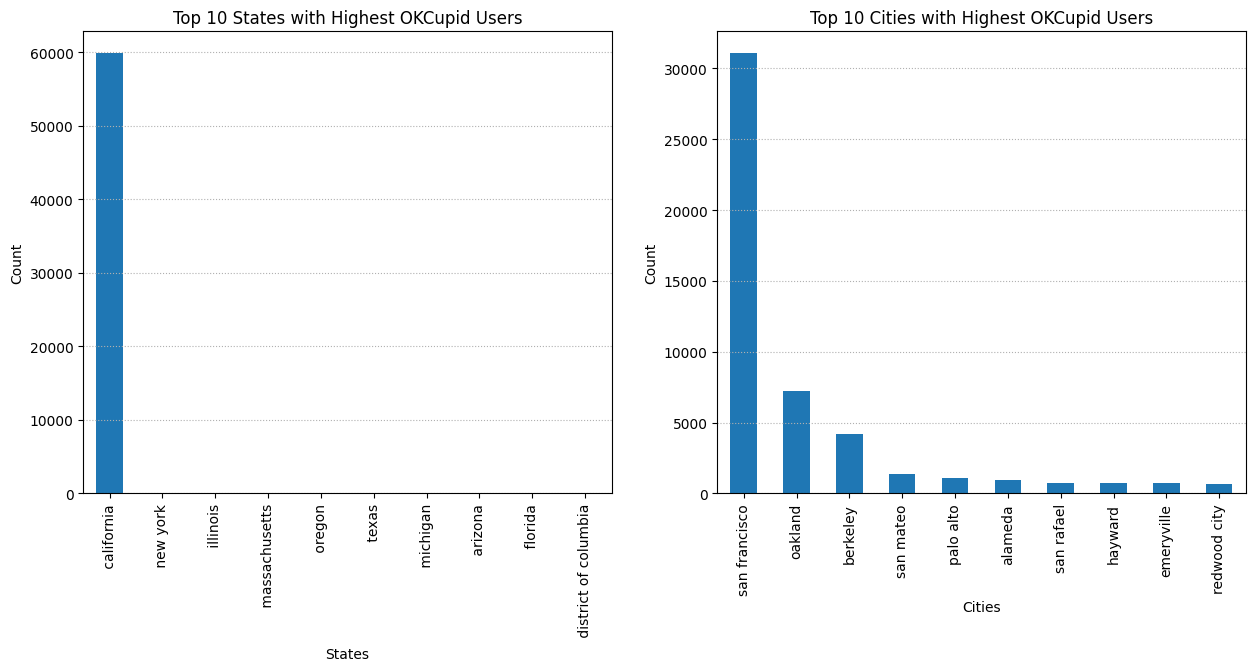

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(15,6))
# Left plot for States
state_counts.plot(kind='bar',ax=axes[0])
axes[0].set_xlabel('States')
axes[0].set_ylabel('Count')
axes[0].set_title('Top 10 States with Highest OKCupid Users')
axes[0].grid(axis='y', linestyle=':')

# Right plot for Cities
city_counts.plot(kind='bar', ax=axes[1])
axes[1].set_xlabel('Cities')
axes[1].set_ylabel('Count')
axes[1].set_title('Top 10 Cities with Highest OKCupid Users')
axes[1].grid(axis='y', linestyle=':')

plt.show()

Almost all (99%) of the users live in California in the US, and among these users, more than half live in the city of San Fransisco.

#### Body-Type of OKCupid Users

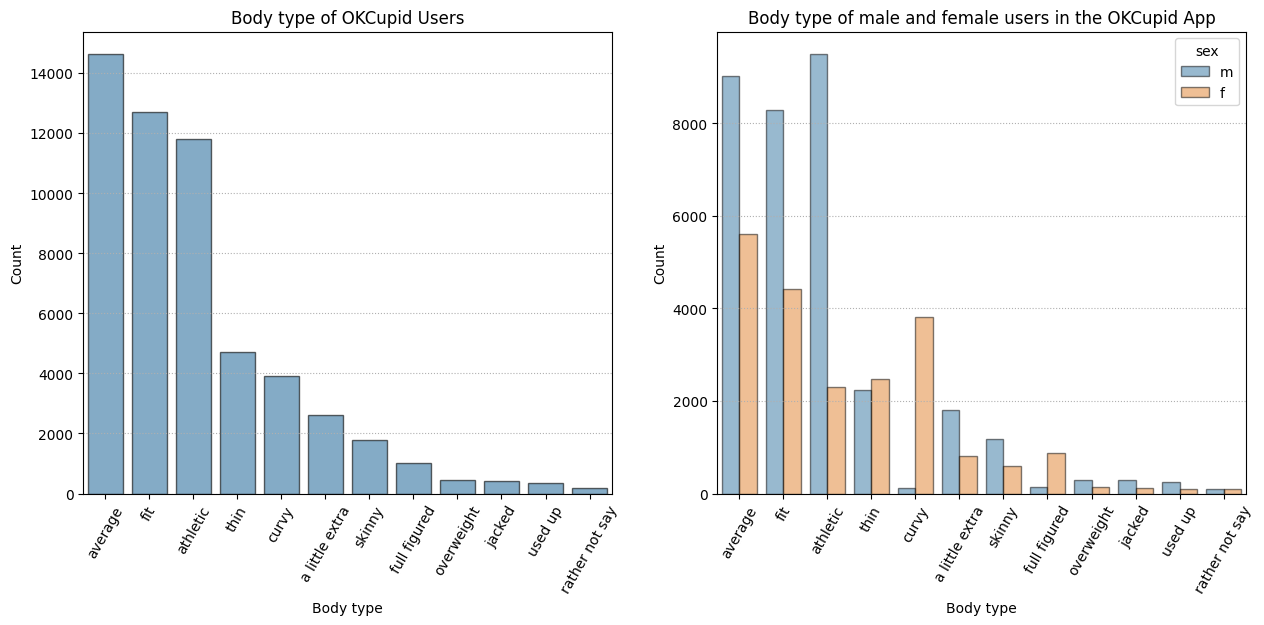

In [54]:
fig = plt.subplots(1,2, figsize=(15,6))
plt.subplot(1, 2, 1)
sns.countplot(data=profiles, x='body_type', order=profiles['body_type'].value_counts().index, edgecolor='black', alpha=0.6)
plt.xlabel('Body type')
plt.ylabel('Count')
plt.xticks(rotation=60)
plt.title('Body type of OKCupid Users')
plt.grid(axis='y', linestyle=':')

plt.subplot(1, 2, 2)
sns.countplot(data=profiles, x='body_type', hue='sex', order=profiles['body_type'].value_counts().index, edgecolor='black', alpha=0.5)
plt.xlabel('Body type')
plt.ylabel('Count')
plt.xticks(rotation=60)
plt.title('Body type of male and female users in the OKCupid App')
plt.grid(axis='y', linestyle=':')

plt.show()

From the left chart, most users describe themselves as average, fit, or athletic. The right chart shows the distribution of body type by gender and it seems that most of the "curvy" and "full figured" descriptions are realted to females, while alot of males describes themselves as 'average', 'fit', 'athletic'and 'a little extra'.

#### Offspring of OKCupid Users

In [55]:
print(profiles.offspring.unique())

['doesn&rsquo;t have kids, but might want them' nan
 'doesn&rsquo;t want kids' 'doesn&rsquo;t have kids, but wants them'
 'doesn&rsquo;t have kids' 'wants kids' 'has a kid' 'has kids'
 'doesn&rsquo;t have kids, and doesn&rsquo;t want any'
 'has kids, but doesn&rsquo;t want more'
 'has a kid, but doesn&rsquo;t want more' 'has a kid, and wants more'
 'has kids, and might want more' 'might want kids'
 'has a kid, and might want more' 'has kids, and wants more']


In [56]:
profiles.offspring = profiles.offspring.str.replace(r"&rsquo;", "'", regex=True)
print(profiles.offspring.unique())

["doesn't have kids, but might want them" nan "doesn't want kids"
 "doesn't have kids, but wants them" "doesn't have kids" 'wants kids'
 'has a kid' 'has kids' "doesn't have kids, and doesn't want any"
 "has kids, but doesn't want more" "has a kid, but doesn't want more"
 'has a kid, and wants more' 'has kids, and might want more'
 'might want kids' 'has a kid, and might want more'
 'has kids, and wants more']


In [57]:
print(profiles.offspring.value_counts(normalize=True)*100)

offspring
doesn't have kids                          31.002666
doesn't have kids, but might want them     15.890917
doesn't have kids, but wants them          14.619643
doesn't want kids                          12.003281
has kids                                    7.721960
has a kid                                   7.713758
doesn't have kids, and doesn't want any     4.642198
has kids, but doesn't want more             1.812590
has a kid, but doesn't want more            1.127742
has a kid, and might want more              0.947304
wants kids                                  0.922698
might want kids                             0.746360
has kids, and might want more               0.471601
has a kid, and wants more                   0.291163
has kids, and wants more                    0.086119
Name: proportion, dtype: float64


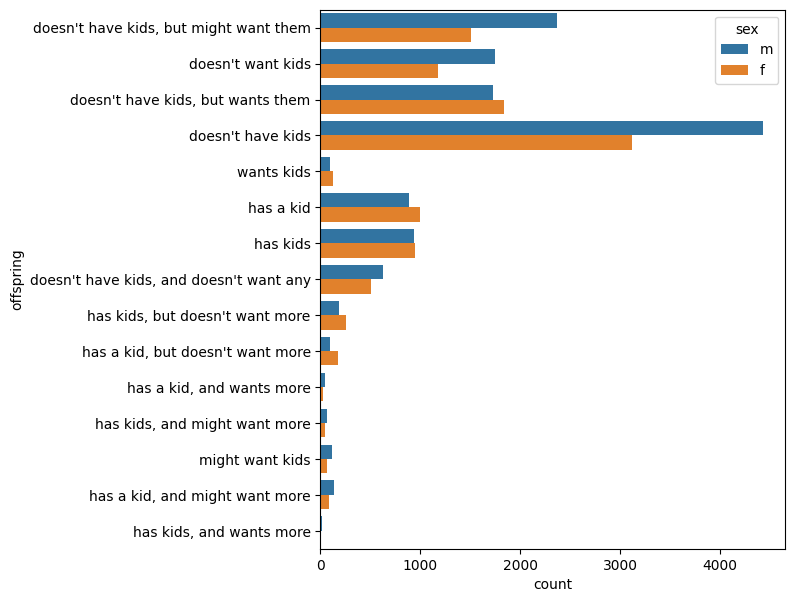

In [58]:
plt.figure(figsize=(6,7))
sns.countplot(data=profiles, y="offspring", hue='sex');

Vast majority of users don't have kids, followed by an indication that they want or might want them. More women want kids or already have them than men.

#### Pets owned by OKCupid Users

In [59]:
print(profiles.pets.value_counts(normalize=True)*100)

pets
likes dogs and likes cats          37.011868
likes dogs                         18.048720
likes dogs and has cats            10.775765
has dogs                           10.328545
has dogs and likes cats             5.828857
likes dogs and dislikes cats        5.069332
has dogs and has cats               3.682698
has cats                            3.512804
likes cats                          2.655840
has dogs and dislikes cats          1.379138
dislikes dogs and likes cats        0.599625
dislikes dogs and dislikes cats     0.489694
dislikes cats                       0.304809
dislikes dogs and has cats          0.202374
dislikes dogs                       0.109931
Name: proportion, dtype: float64


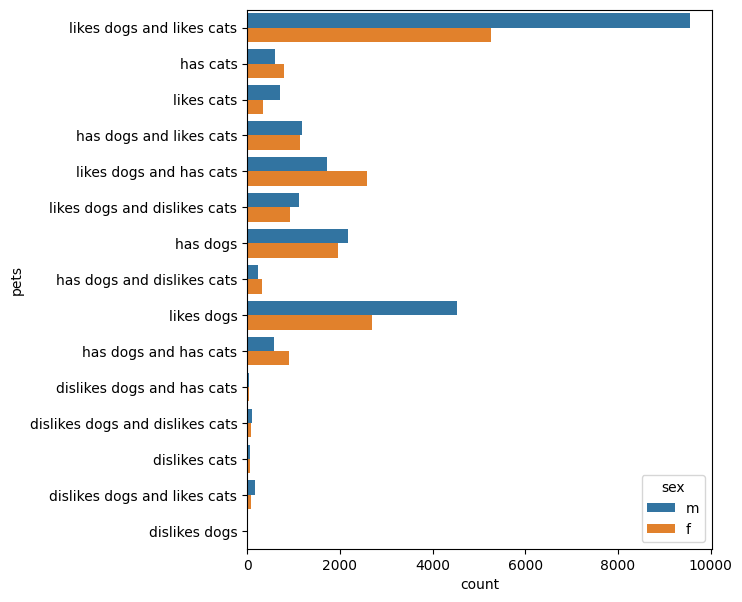

In [60]:
plt.figure(figsize=(6,7))
sns.countplot(data=profiles, y="pets", hue='sex');

From the chart, Most people like dogs and cats, with more people liking dogs. Women seem to have cats at a higher rate than men, but also have more range in responses as to whether they like cats or not.

#### Job Roles of Users

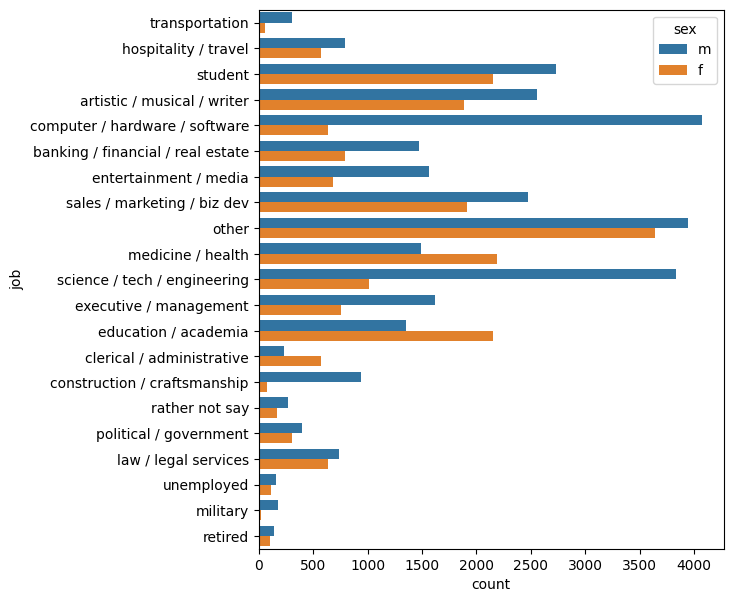

In [61]:
plt.figure(figsize=(6,7))
sns.countplot(data=profiles, y="job", hue='sex');

From the chart, we can see that there is a variety of jobs and careers, the most amount of people list their occupation as "other". It is interesting to note the "science/tech/engineering", "computer/hardware/software", and "construction/craftsmanship" work is attributed to more males, and the "medicine/health", "education/academia", and "clerical/administrative" work is attributed to more females. There is a close to equal distribution between males and females in the "law/legal services" sector.

#### Education

In [62]:
print(profiles.education.value_counts(normalize=True)*100)

education
graduated from college/university    44.936044
graduated from masters program       16.806707
working on college/university        10.713080
working on masters program            3.156533
graduated from two-year college       2.871451
graduated from high school            2.678270
graduated from ph.d program           2.385686
graduated from law school             2.104355
working on two-year college           2.014329
dropped out of college/university     1.866162
working on ph.d program               1.843655
college/university                    1.502307
graduated from space camp             1.232229
dropped out of space camp             0.980907
graduated from med school             0.836490
working on space camp                 0.834615
working on law school                 0.504520
two-year college                      0.416370
working on med school                 0.397614
dropped out of two-year college       0.358228
dropped out of masters program        0.262575
mas

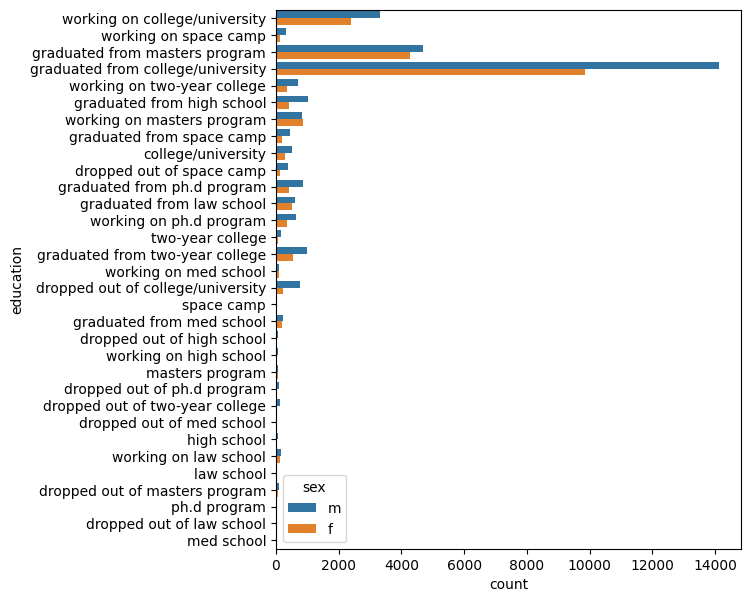

In [63]:
plt.figure(figsize=(6,7))
sns.countplot(data=profiles, y="education", hue='sex');

From the chart, we can see that the majority of users are graduate from college/university, followed by masters programs and those working on college/university.

#### Religion

In [64]:
profiles['religionCleaned'] = profiles.religion.str.split().str.get(0)
profiles['religionCleaned'].unique()

array(['agnosticism', nan, 'atheism', 'christianity', 'other',
       'catholicism', 'buddhism', 'judaism', 'hinduism', 'islam'],
      dtype=object)

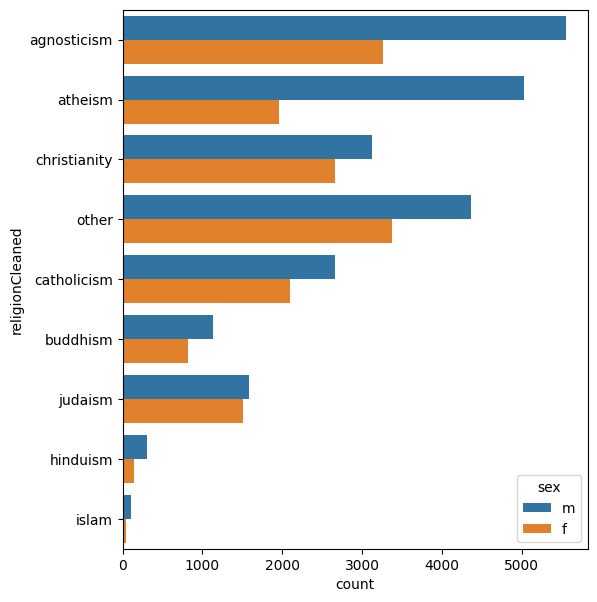

In [65]:
plt.figure(figsize=(6,7))
sns.countplot(data=profiles, y="religionCleaned", hue='sex');

The religion column was cleaned to take the first word and reduce the many groups of data to a group of 9 datas. The majority of users identify as agnosticism, other, or atheists. Only a few users identify as islams.

#### Lifestyle: Diet, Drinks, Drugs and Smoking Status
We want to look at the lifestyle of both male and female users in the App

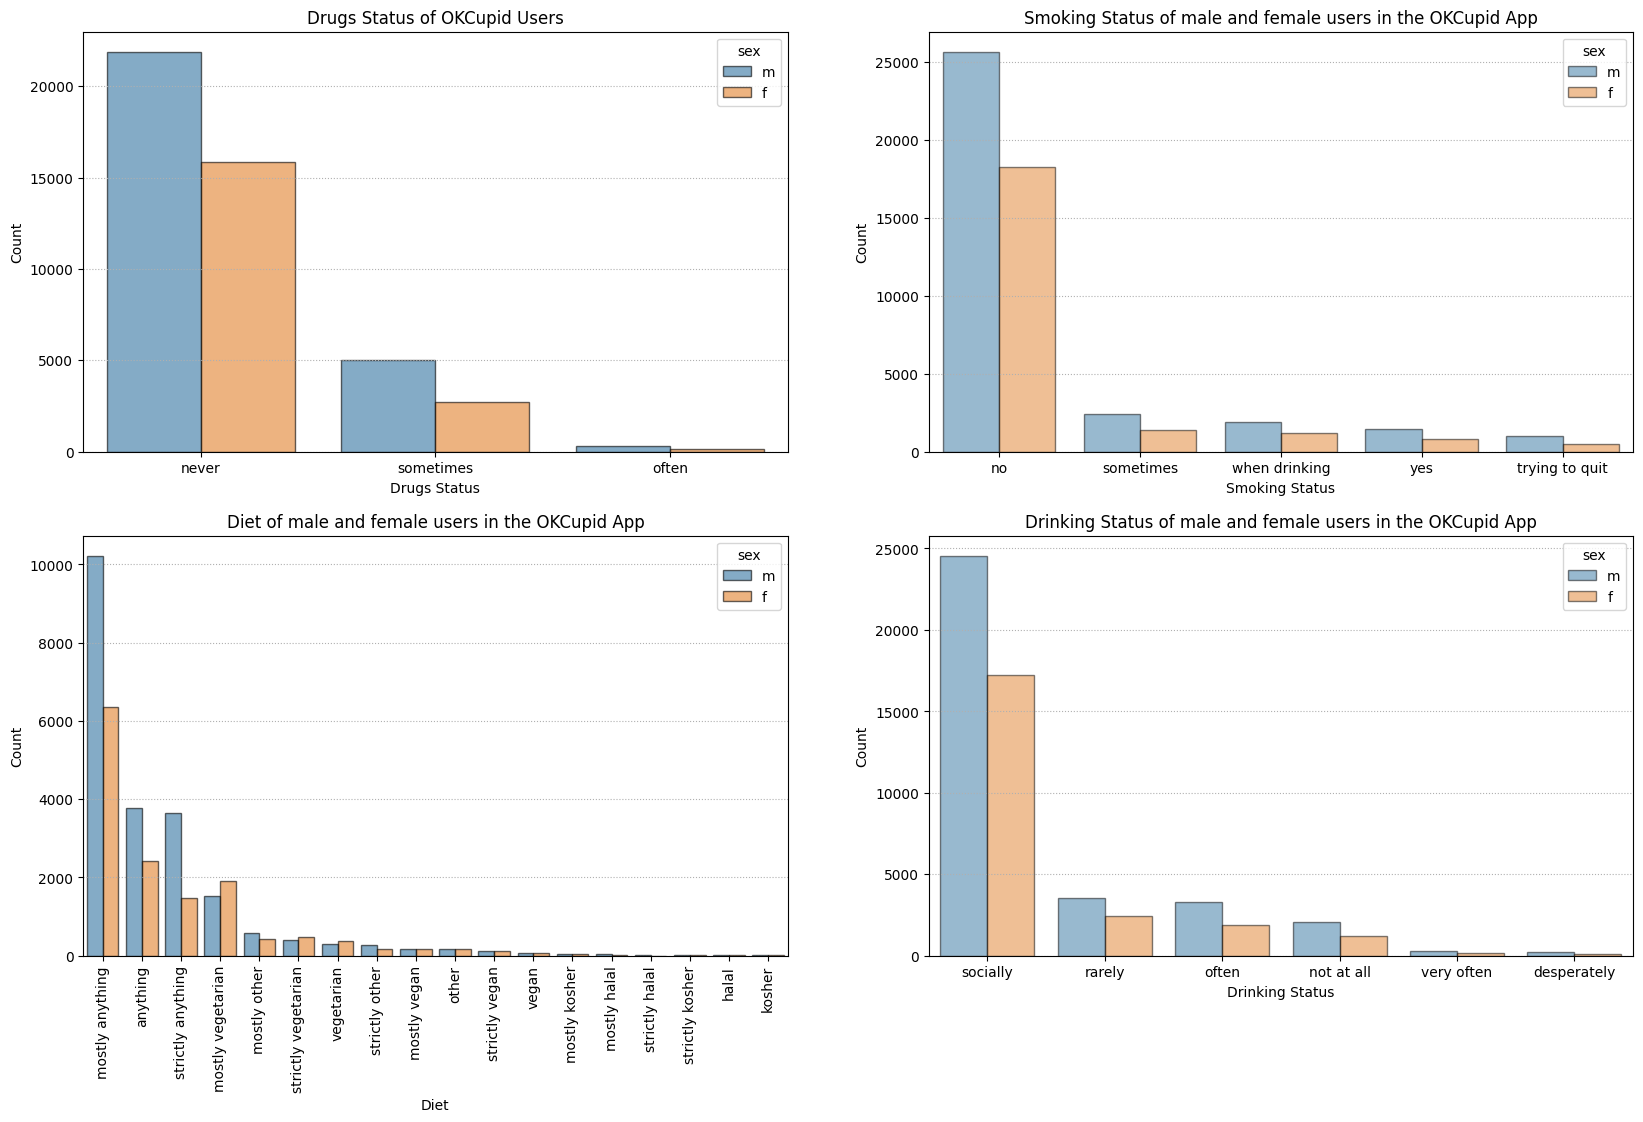

In [66]:
fig = plt.subplots(2,2, figsize=(20,12))
plt.subplot(2, 2, 1)
sns.countplot(data=profiles, x='drugs', hue='sex', order=profiles['drugs'].value_counts().index, edgecolor='black', alpha=0.6)
plt.xlabel('Drugs Status')
plt.ylabel('Count')
#plt.xticks(rotation=60)
plt.title('Drugs Status of OKCupid Users')
plt.grid(axis='y', linestyle=':')

plt.subplot(2, 2, 2)
sns.countplot(data=profiles, x='smokes', hue='sex', order=profiles['smokes'].value_counts().index, edgecolor='black', alpha=0.5)
plt.xlabel('Smoking Status')
plt.ylabel('Count')
#plt.xticks(rotation=60)
plt.title('Smoking Status of male and female users in the OKCupid App')
plt.grid(axis='y', linestyle=':')

plt.subplot(2, 2, 3)
sns.countplot(data=profiles, x='diet', hue='sex', order=profiles['diet'].value_counts().index, edgecolor='black', alpha=0.6)
plt.xlabel('Diet')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Diet of male and female users in the OKCupid App')
plt.grid(axis='y', linestyle=':')

plt.subplot(2, 2, 4)
sns.countplot(data=profiles, x='drinks', hue='sex', order=profiles['drinks'].value_counts().index, edgecolor='black', alpha=0.5)
plt.xlabel('Drinking Status')
plt.ylabel('Count')
#plt.xticks(rotation=60)
plt.title('Drinking Status of male and female users in the OKCupid App')
plt.grid(axis='y', linestyle=':')

plt.show()

Above are charts of the lifestyle information (diet, drinks, drugs and smokes) for users. The dietary plot shows that most users eat "mostly anything", followed by "anything", and "strictly anything". The drinks plot shows that the majority of the users drink "socially", then "rarely" and "often". For the drugs plot, the vast majority of users "never" use drugs and few users sometimes use drugs with males having the highest proportion compared to females. Similarly for smoking status the majority of users chose "no" for smoking. In all lifestyle plots, the males dominated most categories of each plot

### MACHINE LEARNING

#### DATA PREPARATION

#### Missing Data
We will be work data imputation or removal in some missing values and getting the data ready to works with Machine Learning as Machine Learning does not handle missing data properly.

In [67]:
profiles.isna().sum()

age                    0
body_type           5296
diet               24395
drinks              2985
drugs              14080
education           6628
essay0              5488
essay1              7572
essay2              9638
essay3             11476
essay4             10537
essay5             10850
essay6             13771
essay7             12451
essay8             19225
essay9             12603
ethnicity              0
height                 3
income             48442
job                 8198
last_online            0
location               0
offspring          35561
orientation            0
pets               19921
religion           20226
sex                    0
sign               11056
smokes              5512
speaks                50
status                 0
city                   0
state                  0
religionCleaned    20226
dtype: int64

#### PREPROCESSING
We now choose the data to use to classify Zodiac signs and also predict a user’s zodiac signs so we can guess the missing zodiacs when we make matches.

We will keep the following variables:

- sign (Zodiac signs): The target variable we will be working with!
- users' statistics: sex, age 
- lifestyle categories: body_type, diet, drinks, drugs, smokes, job, religion.
- essays: essay0, essay1, essay2, essay3, essay4, essay5, essay6, essay7, essay8, essay9

We will be dropping the following variables:

- location:  the makeup of this data is Californian
- ethnicity: 90% of the users population are white
- speaks: all users speak english
- status: about 93% of the users are single people
- education: majority of the users are graduates, so education is not a key predictor
- income: 80% of the users did not fill in their income and keeping this variable in, would get rid of 20% of our data.
- pets: majority of the users likes either dog or cats, so it will not be a good predictor for our target variable
- height: height is not a good predictor for zodiac sign and will introduce noise to our model
- offspring: majority of the users population doesn't have kids and doesn't want kids.
- orientation: 86% of the users are straight

These variables were selected because they might be a good predictor for zodiac signs. Due to the large numbers of missing datas, we will not go through any imputation method but rather we will drop the na (missing) values to create a clean and complete dataset suitable for machine learning models.

In [68]:
#Define the essay columns
essay_cols = ['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9']
print(profiles[essay_cols].shape)
profiles[essay_cols] = profiles[essay_cols].apply(lambda col: col.str.replace(r"\n<br\s*/?>", " ", regex=True))
profiles[essay_cols].head()

(59946, 10)


,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,about me:<br /> \ni would love to think that i...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...
1,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN
2,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ..."
3,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.
4,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians<br />\nat the...",NaN,NaN,NaN,NaN,NaN


In [69]:
#Missing essays is not missing profile so we Keeps all rows and Empty string is safe for TF-IDF
profiles[essay_cols] = profiles[essay_cols].fillna('')
#Concatenates all essays, Preserves word order, Creates one NLP-ready text field
profiles['combined_essay'] = profiles[essay_cols].agg(' '.join, axis=1)
#clean extra whitespace
profiles['combined_essay'] = (profiles['combined_essay'].str.replace(r'\s', ' ', regex=True).str.strip())
#check all list of columns
profiles[['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9', 'combined_essay']].head()


,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,combined_essay
0,about me:<br /> \ni would love to think that i...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,about me:<br /> i would love to think that i ...
1,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,,,i am very open and will share just about anyth...,,i am a chef: this is what that means.<br /> 1....
2,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...","i'm not ashamed of much, but writing public te..."
3,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",,cats and german philosophy,,,you feel so inclined.,i work in a library and go to school. . . read...
4,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians<br />\nat the...",,,,,,hey how's it going? currently vague on the pro...


In [70]:
profiles['combined_essay'] = (profiles['combined_essay'].str.replace(r'<strong><em>', ' ', regex=True).str.strip())
profiles['combined_essay'] = (profiles['combined_essay'].str.replace(r'</strong></em>', ' ', regex=True).str.strip())
profiles['combined_essay'] = (profiles['combined_essay'].str.replace(r'<em><strong>', ' ', regex=True).str.strip())
profiles['combined_essay'] = (profiles['combined_essay'].str.replace(r'</em></strong>', ' ', regex=True).str.strip())
profiles['combined_essay'] = (profiles['combined_essay'].str.replace(r'</em></strong>', ' ', regex=True).str.strip())
profiles['combined_essay'] = (profiles['combined_essay'].str.replace(r'<em>', ' ', regex=True).str.strip())
profiles['combined_essay'] = (profiles['combined_essay'].str.replace(r'<strong>', ' ', regex=True).str.strip())
profiles['combined_essay'] = (profiles['combined_essay'].str.replace(r'<[^<>]*\>', ' ', regex=True).str.strip())
profiles['combined_essay'] = (profiles['combined_essay'].str.replace(r'https?://', ' ', regex=True).str.strip())
profiles['combined_essay'] = (profiles['combined_essay'].str.replace(r"\n", "'"))
profiles['combined_essay'] = (profiles['combined_essay'].str.replace(r"    ", ""))
profiles['combined_essay'] = (profiles['combined_essay'].str.lower())
profiles['combined_essay'] = (profiles['combined_essay'].str.strip())
  
print(profiles['combined_essay'].isna().sum())

0


In [71]:
cols = ['sex', 'body_type', 'diet', 'drinks', 'drugs', 'smokes', 'job','religionCleaned', 'combined_essay', 'sign']
profiles[cols].head()

,sex,body_type,diet,drinks,drugs,smokes,job,religionCleaned,combined_essay,sign
0,m,a little extra,strictly anything,socially,never,sometimes,transportation,agnosticism,about me: i would love to think that i was s...,gemini
1,m,average,mostly other,often,sometimes,no,hospitality / travel,agnosticism,i am a chef: this is what that means. 1. i am...,cancer
2,m,thin,anything,socially,NaN,no,NaN,NaN,"i'm not ashamed of much, but writing public te...",pisces
3,m,thin,vegetarian,socially,NaN,no,student,NaN,i work in a library and go to school. . . read...,pisces
4,m,athletic,NaN,socially,never,no,artistic / musical / writer,NaN,hey how's it going? currently vague on the pro...,aquarius


In [72]:
cols = ['age','sex', 'body_type', 'diet', 'drinks', 'drugs', 'smokes', 'job','religionCleaned', 'combined_essay', 'sign']
profiles_cols = profiles[cols].isna().sum()
print(profiles_cols)

age                    0
sex                    0
body_type           5296
diet               24395
drinks              2985
drugs              14080
smokes              5512
job                 8198
religionCleaned    20226
combined_essay         0
sign               11056
dtype: int64


In [73]:
#create a copy of the raw dataset (profiles)
#profiles_clean = profiles.copy()
df_model = profiles[cols].dropna(subset=['sign']).copy()
#fill all our missing features with unknown
df_model = df_model.fillna('unknown')
df_model.head()

,age,sex,body_type,diet,drinks,drugs,smokes,job,religionCleaned,combined_essay,sign
0,22,m,a little extra,strictly anything,socially,never,sometimes,transportation,agnosticism,about me: i would love to think that i was s...,gemini
1,35,m,average,mostly other,often,sometimes,no,hospitality / travel,agnosticism,i am a chef: this is what that means. 1. i am...,cancer
2,38,m,thin,anything,socially,unknown,no,unknown,unknown,"i'm not ashamed of much, but writing public te...",pisces
3,23,m,thin,vegetarian,socially,unknown,no,student,unknown,i work in a library and go to school. . . read...,pisces
4,29,m,athletic,unknown,socially,never,no,artistic / musical / writer,unknown,hey how's it going? currently vague on the pro...,aquarius


In [74]:
print(df_model.shape)
print(df_model.isna().sum())

(48890, 11)
age                0
sex                0
body_type          0
diet               0
drinks             0
drugs              0
smokes             0
job                0
religionCleaned    0
combined_essay     0
sign               0
dtype: int64


In [75]:
print(df_model['sign'].shape)
print(df_model['sign'].isna().sum())

(48890,)
0


In [76]:
print(df_model['sign'].unique())

['gemini' 'cancer' 'pisces' 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'leo' 'aries' 'libra' 'scorpio' 'capricorn']


In [77]:
signCleaned = df_model['sign'].dropna()
print(signCleaned.shape)

(48890,)


In [78]:
print(signCleaned.isna().sum())
print(signCleaned.unique())

0
['gemini' 'cancer' 'pisces' 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'leo' 'aries' 'libra' 'scorpio' 'capricorn']


#### Label Imbalance

In [79]:
df_model.sign.value_counts()

sign
leo            4374
gemini         4310
libra          4207
cancer         4206
virgo          4141
taurus         4140
scorpio        4134
aries          3989
pisces         3946
sagittarius    3942
aquarius       3928
capricorn      3573
Name: count, dtype: int64

In the given dataset, we observe that the counts of all the zodiac signs has less difference (i.e., without large deviations). Hence, we do not have to worry about imbalances and trying to address this problem as imbalance in a response variable is bad since it means that some labels only occur a few times. This is an issue for machine learning algorithms if there are not enough data to train with which will give bad predictions.

#### Feature groups

In [80]:
#Defining text, categorical, and numeric features.
    
text_feature = 'combined_essay'

cat_features = ['sex', 'body_type', 'diet', 'drinks', 'drugs', 'smokes', 'job','religionCleaned'] #categorical features

num_features = ['age'] #numerical features

#### Train–test split
The data is split into train and validation sets where 20% of the data is reserved for the final validation, while 80% is kept for training the model.

In [81]:
X = df_model.drop(columns=['sign'])
y = signCleaned

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

#### One-hot encode categorical columns

In [82]:
# one hot encoding on the categorical features
# X_cat = pd.get_dummies(X[cat_features], drop_first=False, dtype='int')

# X_cat.head()

X_train_cat = pd.get_dummies(X_train[cat_features], drop_first=False, dtype='int')

X_test_cat = pd.get_dummies(X_test[cat_features], drop_first=False, dtype='int')

X_train_cat

,sex_f,sex_m,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,body_type_overweight,...,religionCleaned_agnosticism,religionCleaned_atheism,religionCleaned_buddhism,religionCleaned_catholicism,religionCleaned_christianity,religionCleaned_hinduism,religionCleaned_islam,religionCleaned_judaism,religionCleaned_other,religionCleaned_unknown
34193,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
56185,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
49987,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
13131,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
28119,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49981,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
49590,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
37540,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
17256,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [83]:
X_test_cat

,sex_f,sex_m,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,body_type_overweight,...,religionCleaned_agnosticism,religionCleaned_atheism,religionCleaned_buddhism,religionCleaned_catholicism,religionCleaned_christianity,religionCleaned_hinduism,religionCleaned_islam,religionCleaned_judaism,religionCleaned_other,religionCleaned_unknown
57461,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
20195,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
45445,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
16758,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
18857,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22889,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5255,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
26700,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
26044,0,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [84]:
print(X_train.columns.tolist())
print(num_features)

['age', 'sex', 'body_type', 'diet', 'drinks', 'drugs', 'smokes', 'job', 'religionCleaned', 'combined_essay']
['age']


In [85]:
scaler = StandardScaler()

X_train_num = scaler.fit_transform(X_train[num_features])
X_test_num  = scaler.transform(X_test[num_features])

In [86]:

tfidf = TfidfVectorizer(
    max_features=5000,
    stop_words='english'
)

X_train_text = tfidf.fit_transform(X_train[text_feature])
X_test_text  = tfidf.transform(X_test[text_feature])

In [87]:
#Stack features
from scipy.sparse import hstack
#train final matrix
X_train_final = hstack([
    X_train_text,           # TF-IDF (sparse)
    X_train_cat,     # one-hot categorical
    X_train_num      # scaled numeric
])

#Test matrix
X_test_final = hstack([ X_test_text, X_test_cat, X_test_num])

In [88]:
#Check if rows must match.
print(X_train_final.shape, y_train.shape)
print(X_test_final.shape, y_test.shape)

(39112, 5084) (39112,)
(9778, 5084) (9778,)


#### Models
For this project three common algorithms will be used to make predictions.

- Logistic Regression 
- Decision Trees
- K-Nearest Neighbor

#### Logistic Regression
Logistic Regression
The first model is using logistic regression with multi_class='auto', solver='liblinear' as default. Using lr_model predictions are created from the training dataset which is used to figure out how well the model preformed.

In [91]:

model = LogisticRegression(max_iter=1000)  # defaults: multi_class='auto', solver='liblinear'

model.fit(X_train_final, y_train)
lr_predictions = model.predict(X_train_final)

In [92]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test_final)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.08488443444467171


In [93]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    aquarius       0.08      0.07      0.08       786
       aries       0.06      0.05      0.06       798
      cancer       0.09      0.10      0.10       841
   capricorn       0.09      0.06      0.07       715
      gemini       0.09      0.10      0.09       862
         leo       0.09      0.11      0.10       875
       libra       0.08      0.09      0.08       841
      pisces       0.09      0.09      0.09       789
 sagittarius       0.10      0.09      0.09       788
     scorpio       0.08      0.08      0.08       827
      taurus       0.09      0.08      0.09       828
       virgo       0.08      0.08      0.08       828

    accuracy                           0.08      9778
   macro avg       0.08      0.08      0.08      9778
weighted avg       0.08      0.08      0.08      9778



#### K Nearest Neighbor

The next models is the KNeighborsClassifier.


In [108]:
#metric='cosine' → better for sparse TF-IDF data
#weights='distance' → closer neighbors matter more
#n_neighbors=15 → reduces noise

# Initialize KNN
knn = KNeighborsClassifier(
    n_neighbors=15,
    metric='cosine',
    weights='distance'
)

# Fit on TRAIN data only
knn.fit(X_train_final, y_train)

# Predict on TEST data only
y_pred_knn = knn.predict(X_test_final)


In [109]:
# Evaluate
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", knn_accuracy)

print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.0859071384741256

KNN Classification Report:
              precision    recall  f1-score   support

    aquarius       0.08      0.08      0.08       786
       aries       0.10      0.09      0.10       798
      cancer       0.09      0.09      0.09       841
   capricorn       0.07      0.06      0.07       715
      gemini       0.07      0.08      0.08       862
         leo       0.10      0.10      0.10       875
       libra       0.10      0.10      0.10       841
      pisces       0.09      0.08      0.08       789
 sagittarius       0.08      0.07      0.07       788
     scorpio       0.08      0.09      0.08       827
      taurus       0.08      0.08      0.08       828
       virgo       0.09      0.10      0.10       828

    accuracy                           0.09      9778
   macro avg       0.09      0.09      0.09      9778
weighted avg       0.09      0.09      0.09      9778



The knn_model had a 9% accuracy.

Below is a confusion matrix of the results with the true values on the y axis and predicted values along the x axis,

In [127]:
cm = confusion_matrix(y_test, y_pred_knn)
knn_labels = knn.classes_

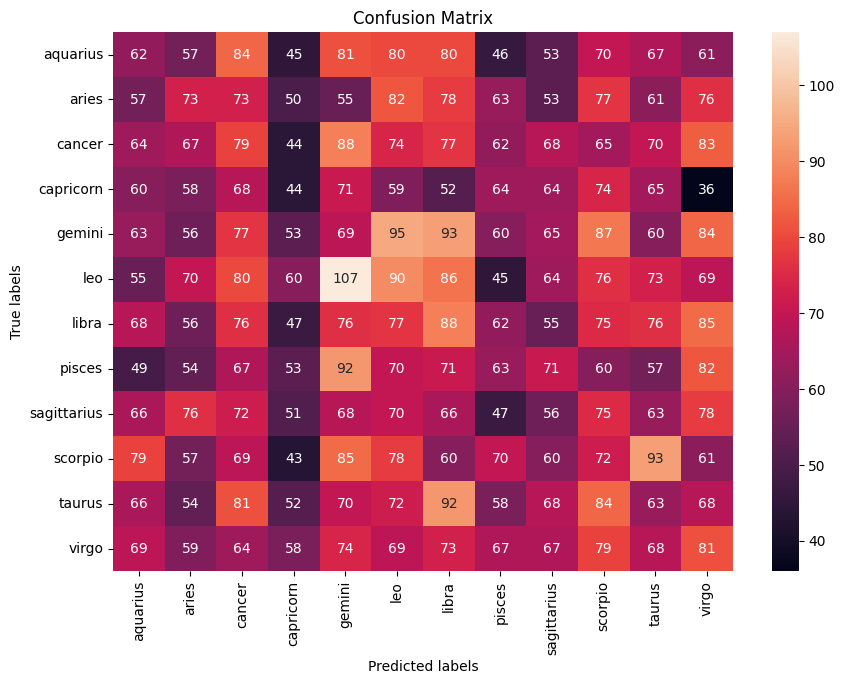

In [129]:
plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt="d");

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(knn_labels); 
ax.yaxis.set_ticklabels(knn_labels);

In the confusion matrix, we have a very weak diagonal.These values are not dominant compared to the rest of the row.

The confusion matrix shows no dominant diagonal structure, indicating the model is unable to learn discriminative patterns for zodiac signs. Predictions are nearly uniformly distributed across classes, suggesting zodiac signs are not predictable from user profile features. Multiple models confirmed this outcome, reinforcing the conclusion that the target variable lacks a meaningful relationship with the predictors.

#### Decision Trees

The last model is the decision tree, Decision Trees do very poorly with high-dimensional sparse data unless constrained. So we must limit depth.

In [110]:
# Initialize Decision Tree
dt = DecisionTreeClassifier(
    max_depth=10,          # VERY IMPORTANT
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)

# Fit
dt.fit(X_train_final, y_train)

# Predict
y_pred_dt = dt.predict(X_test_final)

# Evaluate
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", dt_accuracy)

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt)) 

Decision Tree Accuracy: 0.09040703620372265

Decision Tree Classification Report:
              precision    recall  f1-score   support

    aquarius       0.00      0.00      0.00       786
       aries       0.00      0.00      0.00       798
      cancer       0.07      0.00      0.00       841
   capricorn       0.00      0.00      0.00       715
      gemini       0.09      0.87      0.16       862
         leo       0.10      0.13      0.11       875
       libra       0.00      0.00      0.00       841
      pisces       0.00      0.00      0.00       789
 sagittarius       0.14      0.01      0.02       788
     scorpio       0.33      0.00      0.00       827
      taurus       0.06      0.00      0.00       828
       virgo       0.04      0.00      0.00       828

    accuracy                           0.09      9778
   macro avg       0.07      0.09      0.03      9778
weighted avg       0.07      0.09      0.03      9778



Below is a confusion matrix of the results with the true values on the y axis and predicted values along the x axis, the accuracy is going to be high since those are the True Positives.

In [125]:
cm = confusion_matrix(y_test, y_pred_dt)
dt_labels = dt.classes_

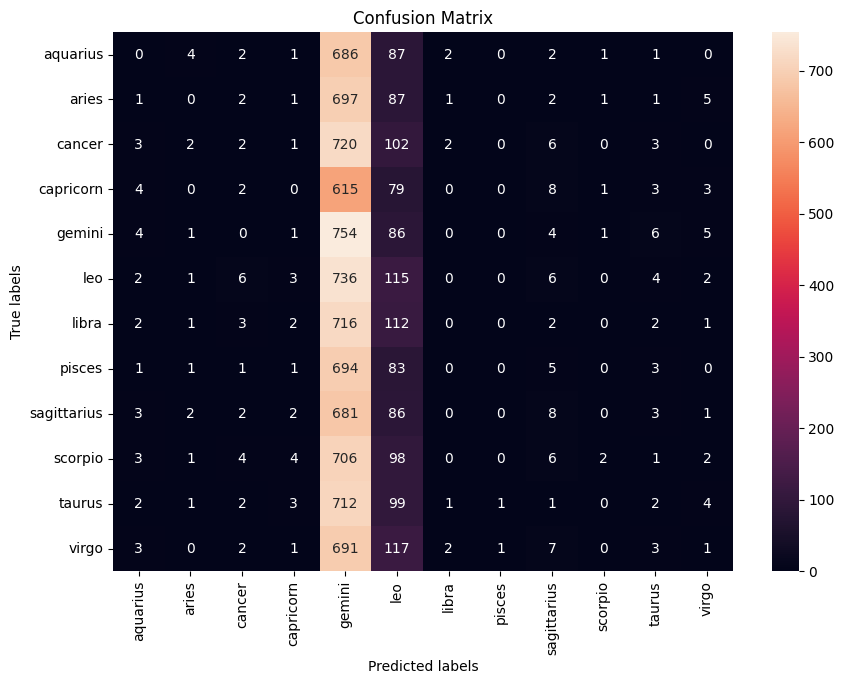

In [126]:
plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt="d");

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(dt_labels); 
ax.yaxis.set_ticklabels(dt_labels);

#### Random Forest Model

The next model is Random Forest model.

In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

#Random Forest does NOT accept sparse matrices. So we convert to dense after combining.
# Convert final sparse matrices to dense
X_train_dense = X_train_final.toarray()
X_test_dense  = X_test_final.toarray()
#Train Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=3,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train_dense, y_train)

#Make predictions
rf_predictions = rf_model.predict(X_test_dense)

In [120]:
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, rf_predictions))

Random Forest Accuracy: 0.0870

Classification Report:
              precision    recall  f1-score   support

    aquarius       0.08      0.01      0.01       786
       aries       0.03      0.00      0.01       798
      cancer       0.08      0.08      0.08       841
   capricorn       0.31      0.01      0.01       715
      gemini       0.09      0.27      0.13       862
         leo       0.09      0.42      0.15       875
       libra       0.08      0.08      0.08       841
      pisces       0.05      0.01      0.01       789
 sagittarius       0.04      0.00      0.00       788
     scorpio       0.07      0.03      0.04       827
      taurus       0.06      0.04      0.04       828
       virgo       0.10      0.05      0.07       828

    accuracy                           0.09      9778
   macro avg       0.09      0.08      0.05      9778
weighted avg       0.09      0.09      0.06      9778



Also got accuracy of 9% for the random forest. This shows that zodiac signs are not predictable from profile data.

#### Linear SVM Model
Finally we use the linear svm model as it (works with sparse matrices):

In [121]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC()
svm_model.fit(X_train_final, y_train)

svm_preds = svm_model.predict(X_test_final)
print("SVM Accuracy:", accuracy_score(y_test, svm_preds))

SVM Accuracy: 0.07905502147678461


In [124]:
print("\nClassification Report:")
print(classification_report(y_test, svm_preds))


Classification Report:
              precision    recall  f1-score   support

    aquarius       0.07      0.08      0.07       786
       aries       0.07      0.06      0.06       798
      cancer       0.08      0.08      0.08       841
   capricorn       0.07      0.06      0.07       715
      gemini       0.08      0.09      0.09       862
         leo       0.08      0.09      0.08       875
       libra       0.07      0.07      0.07       841
      pisces       0.08      0.08      0.08       789
 sagittarius       0.08      0.08      0.08       788
     scorpio       0.09      0.09      0.09       827
      taurus       0.09      0.08      0.08       828
       virgo       0.08      0.08      0.08       828

    accuracy                           0.08      9778
   macro avg       0.08      0.08      0.08      9778
weighted avg       0.08      0.08      0.08      9778



A Linear Support Vector Machine was trained on combined categorical, numerical, and TF-IDF text features. The model achieved approximately 8% accuracy, equivalent to random baseline performance. This further confirms the absence of a linear relationship between user profile features and zodiac signs.

### CONCLUSION

### NEXT STEP/ RECOMMENDATION